# Census Income Data Set- Wrangling and Exploration(Data Analysis with Python)

Data Source:https://archive.ics.uci.edu/ml/datasets/census+income
https://www.kaggle.com/dannydoeslight/uci-us-census-income-original-dataset?select=adult.data


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
#we create list with names of attributes given:
name_gv = ["age", "workclass",
           "fnlwgt",
           "education",
           "education-num",
           "marital-status",
           "occupation",
           "relationship",
           "race",
           "sex",
           "capital-gain",
           "capital-loss",
           "hours-per-week",
           "native-country",
           "annual-income"
          ]

In [127]:
#Read the .data file as csv and save it as dataFrame(df)
df = pd.read_csv("C:/Users/abhis/Documents/Python -Projects/DataWrangling/DataSet/adult.data",names=name_gv)

In [128]:
#we take a look at data
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [129]:
#lets check the structure of the data
df.info()
#we get info which column is integer and which is an object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual-income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [130]:
#gives us the number of rows and columns
df.shape
#we can see the output of the number of columns and rows

(32561, 15)

In the data head we can see that column capital-gain and capital loss have lots of values as zero.This can mean anything so we need to handle this.

In [131]:
#inspect the above columns
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

We can see that almost 30K values are zero which means this column
is not that useful for our analysis

In [132]:
#similar for capital-loss
df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

This column contains almost 31k zero values.

In [133]:
# we drop both the columns
df1=df.drop(['capital-gain','capital-loss'],axis=1)

Now we are left with 13 columns to analyze further

In [134]:
df1['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [135]:
df1['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In Work class we can see the ? data as missing data so we check other 
categorical classes as well for '?' so that we can replace it with 
some frequent values based on the number of missing values compared to complete data set.

In [136]:
#we use this to loop all columns and check for '?'
for col in df1.columns:
    if " ?" in df1[col].unique() or '0' in df1[col].unique():
        print(col+" contains missing value")
    else:
        print(col+" No missing value")
    

age No missing value
workclass contains missing value
fnlwgt No missing value
education No missing value
education-num No missing value
marital-status No missing value
occupation contains missing value
relationship No missing value
race No missing value
sex No missing value
hours-per-week No missing value
native-country contains missing value
annual-income No missing value


C:\Users\abhis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


we can see workclass,occupation and native-country columns contains
missing values


In [137]:
#to decide what to do we need count of missing values
dfm=['workclass','occupation','native-country']
for col in dfm:
    print("---->> %s <<---" % col)
    print(df1[col].value_counts())

---->> workclass <<---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
---->> occupation <<---
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
---->> native-country <<---
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                        

1.We can see native country has 583 missing values ,whereas occupation
has 1843 values missing and for workclass 1836 values are missing

2.What we can do here is either impute them or remove them
This is almost 6% of the total values in data set.
So we replace them with most frequent value in the respective columns

In [138]:
def max_count_replace(d):
    max=df1[d].value_counts().index[0]
    df1[d].replace(" ?",max, inplace=True)
    print(df1[d].value_counts())

for col in dfm:
    max_count_replace(col)
    

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England    

Now we have cleaned the data we can start the analysis.

In [139]:
df1.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [140]:
df1.corr()

,age,fnlwgt,education-num,hours-per-week
age,1.000000,-0.076646,0.036527,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,-0.018768
education-num,0.036527,-0.043195,1.000000,0.148123
hours-per-week,0.068756,-0.018768,0.148123,1.000000


this gives us the idea how the numerical values in data set are
correlated to each other

educational-num and education are reduntant columns means we have to 
remove one of them.We remove education here.

In [141]:
df2=df1.drop(['education'],axis=1)
df2.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual-income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


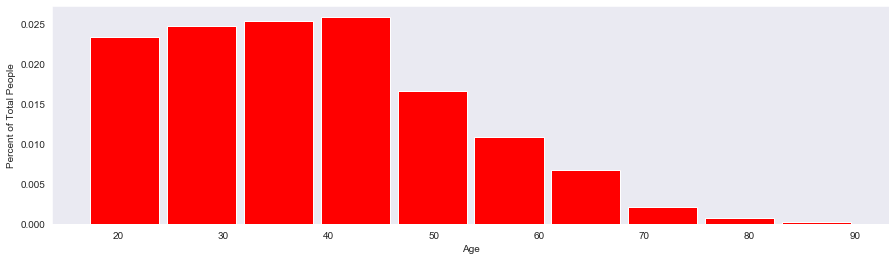

In [600]:
# Plot the histogram for age to check how the distribution is present
plt.figure(figsize=(15,4))
plt.hist(df2["age"],bins=10,histtype='bar',color='red',density=True,rwidth=0.9)

# Label the axes
plt.xlabel('Age')
plt.ylabel('Percent of Total People')

# Show the figure
plt.show()

We can see that more than 65% of the population of our data set is between
25 yrs-45yrs bracket.


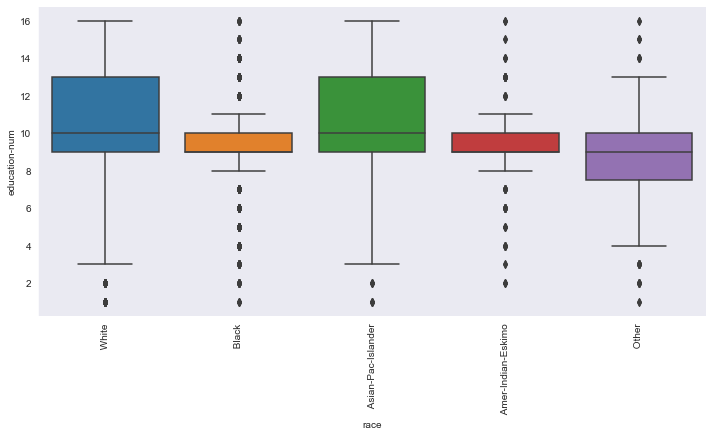

In [598]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="race",y="education-num",
            data=df2,
            kind="box",aspect=2)
plt.xticks(rotation=90)
#hue for subgroup and sym for no outliers
# Show plot
plt.show()

When we see educational level within different communities we can see people of  White and Asian-Pac-Islander ethnicity
have higher Educational Level and Hence dominate the Higher paying jobs.

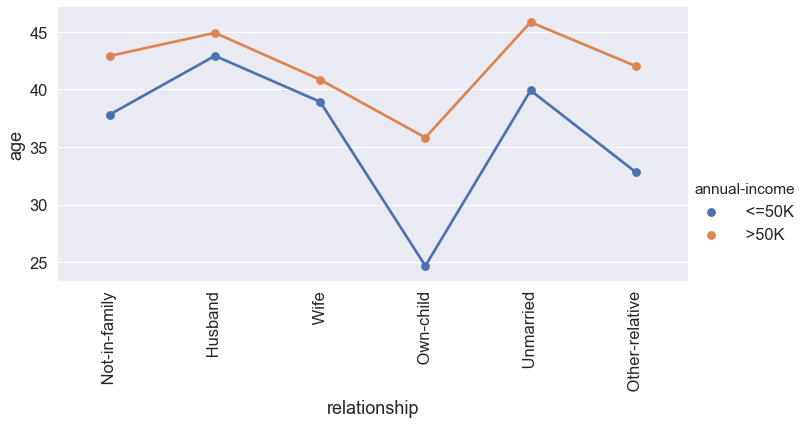

In [656]:
sns.set(font_scale=1.5)
sns.catplot(x="relationship", y="age",
			data=df2,
            kind="point",hue='annual-income',
            capsize=0.4,ci=None,aspect=2)
            
# Show plot
plt.xticks(rotation=90)
plt.show()

This graphs gives another very interesting insight about the starting family early at the age of around 25 yrs
can lead to lower annual income than people who start family at 35 yrs of age.

<Figure size 1440x360 with 0 Axes>

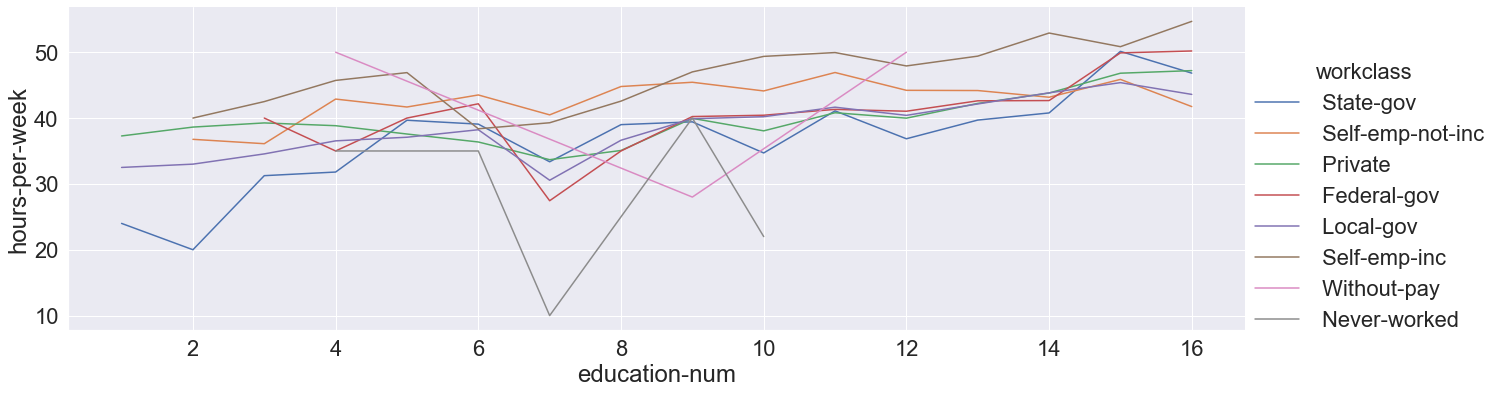

In [614]:
plt.figure(figsize=(20,5))
sns.set(font_scale=2)
z=sns.relplot(x="education-num", y="hours-per-week", 
            data=df2, kind="line", 
            ci=None,sizes=(10,10),
            hue="workclass",markers=True,dashes=True,height=6,aspect=3)

# Show plot
#plt.xticks(rotation=90)
plt.show()


When we see mostly Self employeed People are doing highest hours per week but an interesting trend we can see in our 
population is with increase in educational level hours per week are not decreasing.
Also we can say around 40 hrs a week is the standard in all the occupation.

The people with highest education and lowest workload are self employed people who are not running a big business Inc.

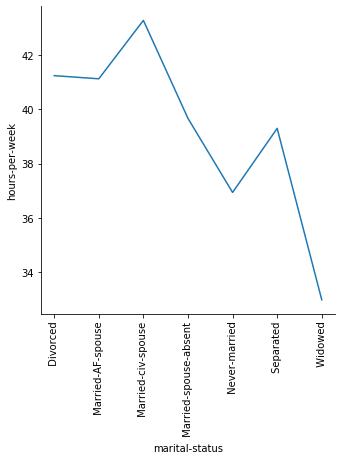

In [150]:
sns.relplot(x="marital-status", y="hours-per-week", 
            data=df2, kind="line", 
            ci=None,
            markers=True,dashes=False)

# Show plot
plt.xticks(rotation=90)
plt.show()

According to this simple line plot we can see Married Civilian Spouse work most per week.

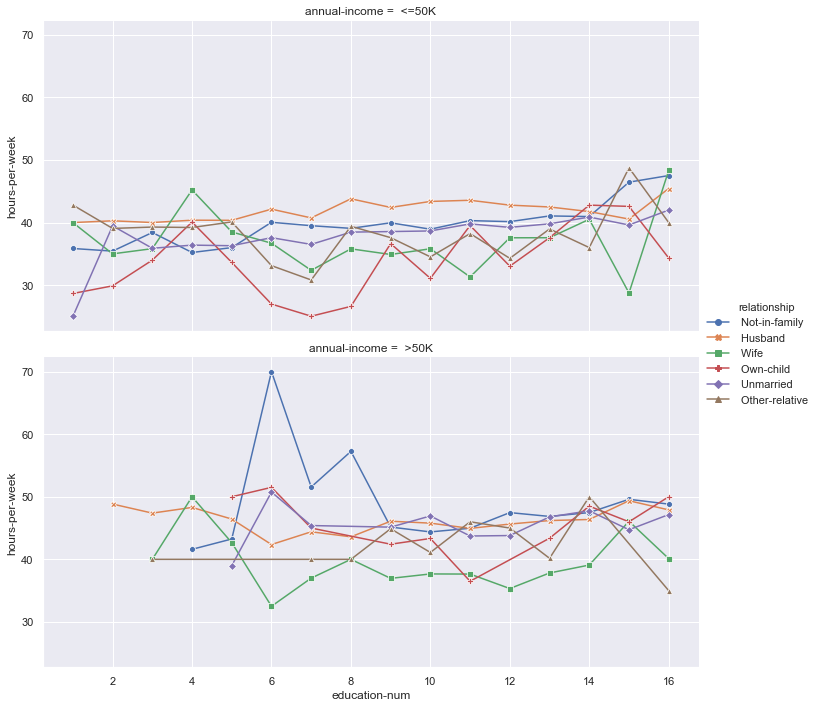

In [616]:
sns.set(font_scale=1)
sns.relplot(x="education-num", y="hours-per-week", 
            data=df2, kind="line",row='annual-income' ,
            ci=None,
            hue="relationship",
            style="relationship",markers=True,dashes=False,aspect=2)

# Show plot
#plt.xticks(rotation=90)
plt.show()

This gives us a point peak here which shows even with very less education level people are earning more than 50k
and when we see a peak which states that people who are not in family but earning more than 50k Work way more hours
per week than others.

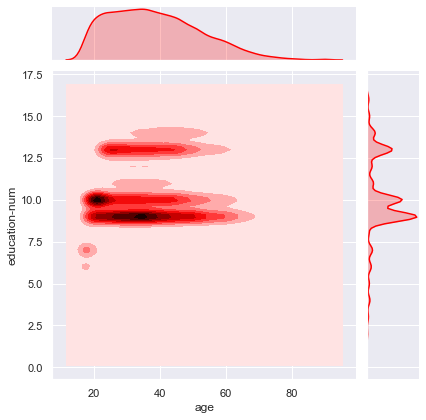

In [652]:
sns.set(font_scale=1)
sns.jointplot("age",
"education-num",
data=df2,
kind='kde',color='red')

plt.show()

This joinplot between education level and age gives up 3 peaks for education num in range of  8.5 - 10 and 12.5.
Basically most of our population set are High School-grad and above.Level above 12.5 are represented by Grads and post grads.

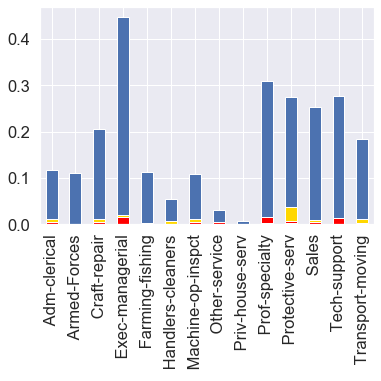

In [716]:
e1=df2[(df2['race']==' White')&(df2['annual-income']==' >50K')]
e2=df2[(df2['race']==' Black')&(df2['annual-income']==' >50K')]
e3=df2[(df2['race']== ' Asian-Pac-Islander')&(df2['annual-income']==' >50K')]
e4=df2[(df2['race']== ' Amer-Indian-Eskimo')&(df2['annual-income']==' >50K')]
e5=df2[(df2['race']== ' Other')&(df2['annual-income']==' >50K')]

f5=e5['occupation'].value_counts()/df2['occupation'].value_counts()
f1=e1['occupation'].value_counts()/df2['occupation'].value_counts()
f2=e2['occupation'].value_counts()/df2['occupation'].value_counts()
f3=e3['occupation'].value_counts()/df2['occupation'].value_counts()
f4=e4['occupation'].value_counts()/df2['occupation'].value_counts()

f1.plot(kind='bar')
f2.plot(kind='bar',color='gold')
f3.plot(kind='bar',color='red')
f4.plot(kind='bar',color='pink')
f5.plot(kind='bar',color='green')

#ic5=e5['annual-income'].value_counts/df2['annual-income'].value_counts()

#sns.catplot(x="education-num", 
#y="sex",
#hue="race",kind='strip',
#data=df2,alpha=0.5)

For our population we can see that in Armed-Forces of America people who earn more than 50k annually are only of
white ethnicity.

In [338]:
df5 = df2[(df2['annual-income'] == ' >50K') & (df2['sex']==" Male")]


df6 = df2[(df2['annual-income'] == ' >50K') & (df2['sex']==" Female")]
print("Female Average hours per week",df6['hours-per-week'].mean())
print("male Average hours per week",df5['hours-per-week'].mean())

Female Average hours per week 40.426632739609836
male Average hours per week 46.366106274392074


In [309]:
df3 = df2[(df2['annual-income'] == ' >50K') & (df2['hours-per-week']<=40)&(df2['sex']==" Male")]
df4 = df2[(df2['annual-income'] == ' >50K') & (df2['hours-per-week']<=40)&(df2['sex']==" Female")]

In [310]:
b1=df3['occupation'].value_counts(normalize=True)
b2=df4['occupation'].value_counts(normalize=True)

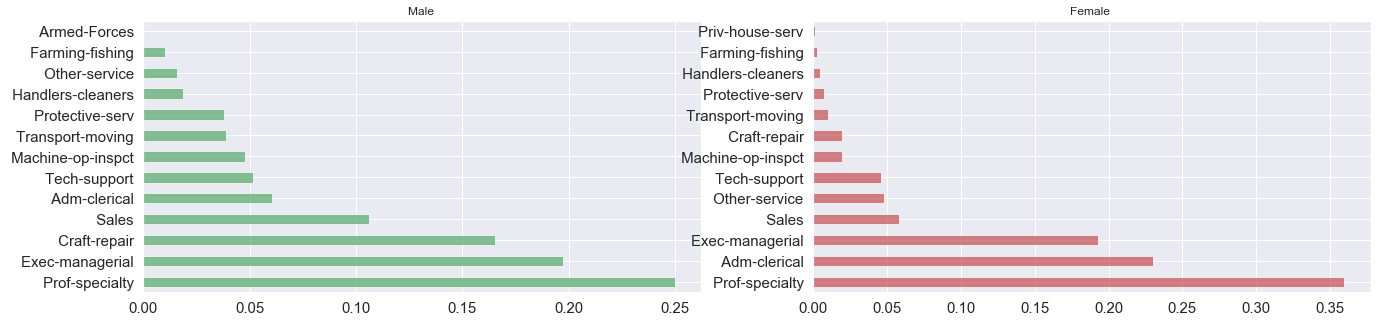

In [648]:
fig, axes = plt.subplots(1, 2)
p1=b1.plot(kind='barh',ax=axes[0],color='g',figsize=(22, 5),alpha=0.7,title=("Male "))
p2=b2.plot(kind='barh',ax=axes[1],color='r',figsize=(22, 5),alpha=0.7,title=("Female "))

axes[0].tick_params(labelsize=15)
axes[1].tick_params(labelsize=15)



In this insight we can see the Male and Females who are earning more than 50k annually with hours-per-week 
less than or equal to 40.This clearly shows how Professions like Prof-speciality have more percentage of females of the total 
female workforce paying high.

For females Adminitrator-clerical jobs are paying high with lower workload compared to mens.

Text(0.5, 0, 'Native-Countries')

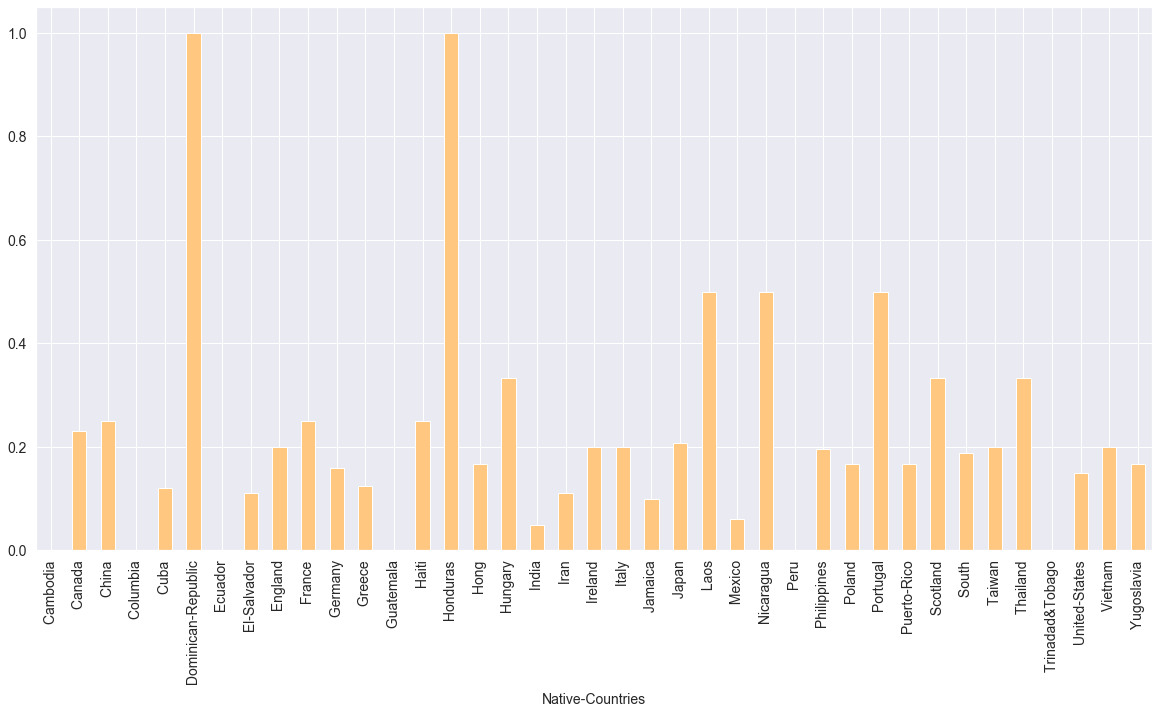

In [650]:
df7=df2[df2['annual-income'] == ' >50K']
b3=df7['native-country'].value_counts()
b4=df6['native-country'].value_counts()
(b4/b3).plot(kind="bar",colormap='copper_r',figsize=(20,10))
plt.tick_params(labelsize=14)
plt.xlabel("Native-Countries",fontsize=14)


The interesting fact that comes out of this graph is Americans with native country as India has the lowest representation of 
Females having salary of more than 50k.Females of Indian and Meixcan Origins earns very less than the rest of the Females.

Dominican-Republic and houduras has the highest percentage of female representative in professional earning more than 50k.

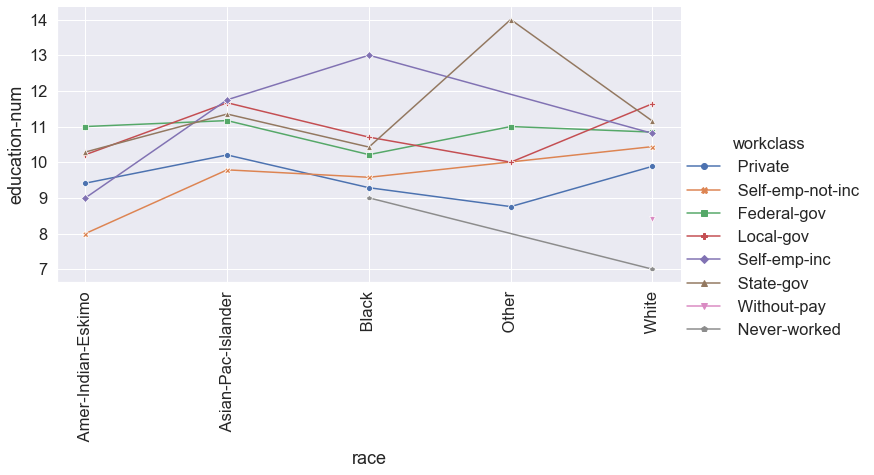

In [619]:

a=df2[df2['sex']==' Female']
sns.set(font_scale=1.5)
sns.relplot(x="race", y="education-num", 
            data=a, kind="line",
            ci=None,
            hue="workclass",
            style="workclass",markers=True,dashes=False,height=5,aspect=2)

# Show plot
plt.xticks(rotation=90)
plt.show()

A very interesting insight from this graphic is Black Female are even after being highly educated,they are self employed and 
generating jobs for many.

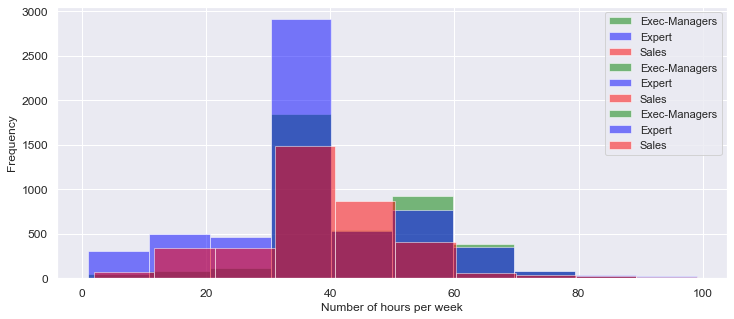

In [629]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of hours per week')
axr=df2[(df2['occupation']==' Exec-managerial')]
axc=df2[(df2['occupation']==' Prof-specialty')]
axz=df2[(df2['occupation']==' Sales')]

ax1 = axr['hours-per-week'].plot(kind='hist',bins=10,color='green', label='Exec-Managers',alpha=0.5)
ax2 = axc['hours-per-week'].plot(kind='hist',bins=10,color='blue', label='Expert',alpha=0.5)
ax3=axz['hours-per-week'].plot(kind='hist',bins=10,color='red',label='Sales',alpha=0.5)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
plt.ylabel("Frequency",fontsize=12)
plt.tick_params(labelsize=12)
plt.legend(h1+h2+h3, l1+l2+l3, loc=1)
plt.show()


Here we can see the Top 3 professions that give high salaries Sales is the one that takes highest time per week.

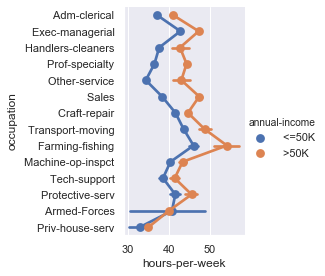

In [620]:
sns.set(font_scale=1)
sns.catplot(x='hours-per-week',
               y='occupation',
            kind='point',
               hue='annual-income',data=df2,alpha=0.5,height=4,aspect=1)


Farming and fishing are the most time consuming jobs for those who are earning higher than 50k.

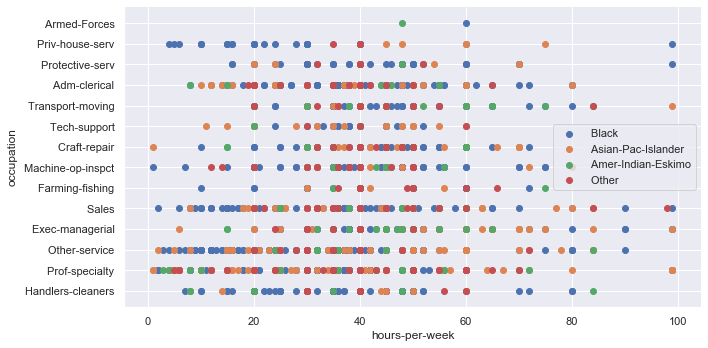

In [739]:
dfw=df2[df2['race']!=' White']
sns.set(font_scale=1)
g = sns.FacetGrid(dfw,
hue='race',height=5,aspect=2)
g = g.map(plt.scatter,"hours-per-week","occupation")

plt.legend(dfw['race'].unique())

We can see from the plot that for non white distribution of population according to occupation shows
low Armed forces representation .
Also Adminitrative clerical,Sales and Prof-speciality are few of the high representing jobs for Non- white people.